In [41]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
DATADIR = "D:/Pattern/Dataset/GunImages"

CATEGORIES = ["M416","AWM","AKM","UMP","UZI"]




In [42]:
IMG_SIZE = 150


In [43]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category) 

        for img in os.listdir(path):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                training_data.append([new_array, class_num])  
            except Exception as e:  
                pass
            
create_training_data()

print(len(training_data))

196


In [44]:
import random

random.shuffle(training_data)

In [45]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [46]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F

In [47]:
trainset = torch.utils.data.DataLoader(training_data, batch_size=5, shuffle=True)

In [48]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(150*150, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 5)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=22500, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=5, bias=True)
)


In [49]:
X = torch.randn((150,150))

In [50]:
X = X.view(-1,150*150)

In [51]:
output = net(X)

In [52]:
output

tensor([[-1.8109, -1.6169, -1.7272, -1.4382, -1.5013]],
       grad_fn=<LogSoftmaxBackward>)

In [53]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [54]:
for epoch in range(3): # 3 full passes over the data
    for data in trainset:  # `data` is a batch of data
        X, y = data  # X is the batch of features, y is the batch of targets.
        net.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
        output = net(X.view(-1,150*150).float())  # pass in the reshaped batch (recall they are 28x28 atm)
        loss = F.nll_loss(output, y)  # calc and grab the loss value
        loss.backward()  # apply this loss backwards thru the network's parameters
        optimizer.step()  # attempt to optimize weights to account for loss/gradients
    print(loss)  # print loss. We hope loss (a measure of wrong-ness) declines! 

tensor(111.0429, grad_fn=<NllLossBackward>)
tensor(51.5883, grad_fn=<NllLossBackward>)
tensor(62.2997, grad_fn=<NllLossBackward>)


In [77]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1,150*150).float())
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.673


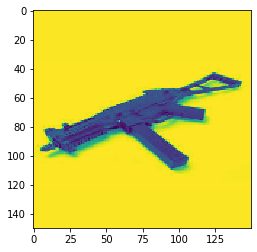

In [78]:
import matplotlib.pyplot as plt

plt.imshow(X[0].view(150,150))
plt.show()

In [79]:
a_featureset = X[0]
reshaped_for_network = a_featureset.view(-1,150*150).float() # 784 b/c 28*28 image resolution.
output = net(reshaped_for_network) #output will be a list of network predictions.
first_pred = output[0]
print(first_pred)

tensor([-2069.0352,     0.0000,  -976.9778,   -65.6088, -1108.9209],
       grad_fn=<SelectBackward>)


In [80]:
biggest_index = torch.argmax(first_pred)

In [81]:
print(CATEGORIES[biggest_index])

AWM
